<a href="https://colab.research.google.com/github/RaminTKhameneh/AAI695HWs/blob/main/Homework_4_Ramin_Khameneh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the results shows in the following table, both the neural network and random forest achieved the same overall accuracy of 74.43%. However, there is a notable difference in the accuracy for predicting survivors and fatalities. The neural network correctly predicted 55.08% of survivors and 90.28% of fatalities, while the random forest correctly predicted 52.54% of survivors and 90.74% of fatalities.

The difference in accuracy between the two algorithms could be due to a variety of factors, including the specific implementation and parameters chosen for each algorithm, as well as differences in how they handle missing data and interact with the features. It is also possible that the difference in accuracy is simply due to chance or the particular split of the data into training and test sets.

\\


| Algorithm | Overall Accuracy | Percent Survivors Correctly Predicted | Percent Fatalities Correctly Predicted |
|-----------|-----------------|--------------------------------------|----------------------------------------|
| Neural Network | 75.2% | 53.39% | 93.06% |
| Random Forest | 74.43% | 55.08% | 90.28% |


# **HW 4**

In [53]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('drive/MyDrive/695HW/Titanic.csv')
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].value_counts().idxmax())
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
X = df[['pclass', 'sex', 'age', 'sibsp']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit neural network models


In [44]:
nn2 = MLPClassifier(hidden_layer_sizes=(30, 20, 10), activation='logistic', solver='adam', alpha=0.0001, 
                    learning_rate_init=0.001, max_iter=1000, random_state=42)

nn2.fit(X_train, y_train)

y_pred2 = nn2.predict(X_test)

accuracy2 = np.mean(y_pred2 == y_test)
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()

print(f"Accuracy: {accuracy2:.3f}")
print(f"Out-of-sample percent survivors correctly predicted: {100*tp2/(tp2+fn2):.3f}")
print(f"Out-of-sample percent fatalities correctly predicted: {100*tn2/(tn2+fp2):.3f}")

Accuracy: 0.752
Out-of-sample percent survivors correctly predicted: 53.390
Out-of-sample percent fatalities correctly predicted: 93.056


## **HW 3**

Making sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

In [45]:
df['survived'].unique()

array([1, 0])

Mapping categorical values into numerical values

In [46]:
df['pclass'].unique(),df['sex'].unique(),df['sibsp'].unique()

(array([1, 2, 3]), array([1, 0]), array([0, 1, 2, 3, 4, 5, 8]))

In [47]:
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

Spliting the dataset into train and test sets


Fitting a decision tree and plotting the full tree


[Text(0.46692438684626186, 0.9736842105263158, 'sex <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]\nclass = Not Survived'),
 Text(0.17090563574938575, 0.9210526315789473, 'age <= 9.5\ngini = 0.288\nsamples = 677\nvalue = [559, 118]\nclass = Not Survived'),
 Text(0.04212004212004212, 0.868421052631579, 'sibsp <= 2.5\ngini = 0.48\nsamples = 35\nvalue = [14, 21]\nclass = Survived'),
 Text(0.022464022464022463, 0.8157894736842105, 'age <= 0.792\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = Survived'),
 Text(0.011232011232011231, 0.7631578947368421, 'age <= 0.375\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Not Survived'),
 Text(0.005616005616005616, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.016848016848016848, 0.7105263157894737, 'age <= 0.583\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.011232011232011231, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'

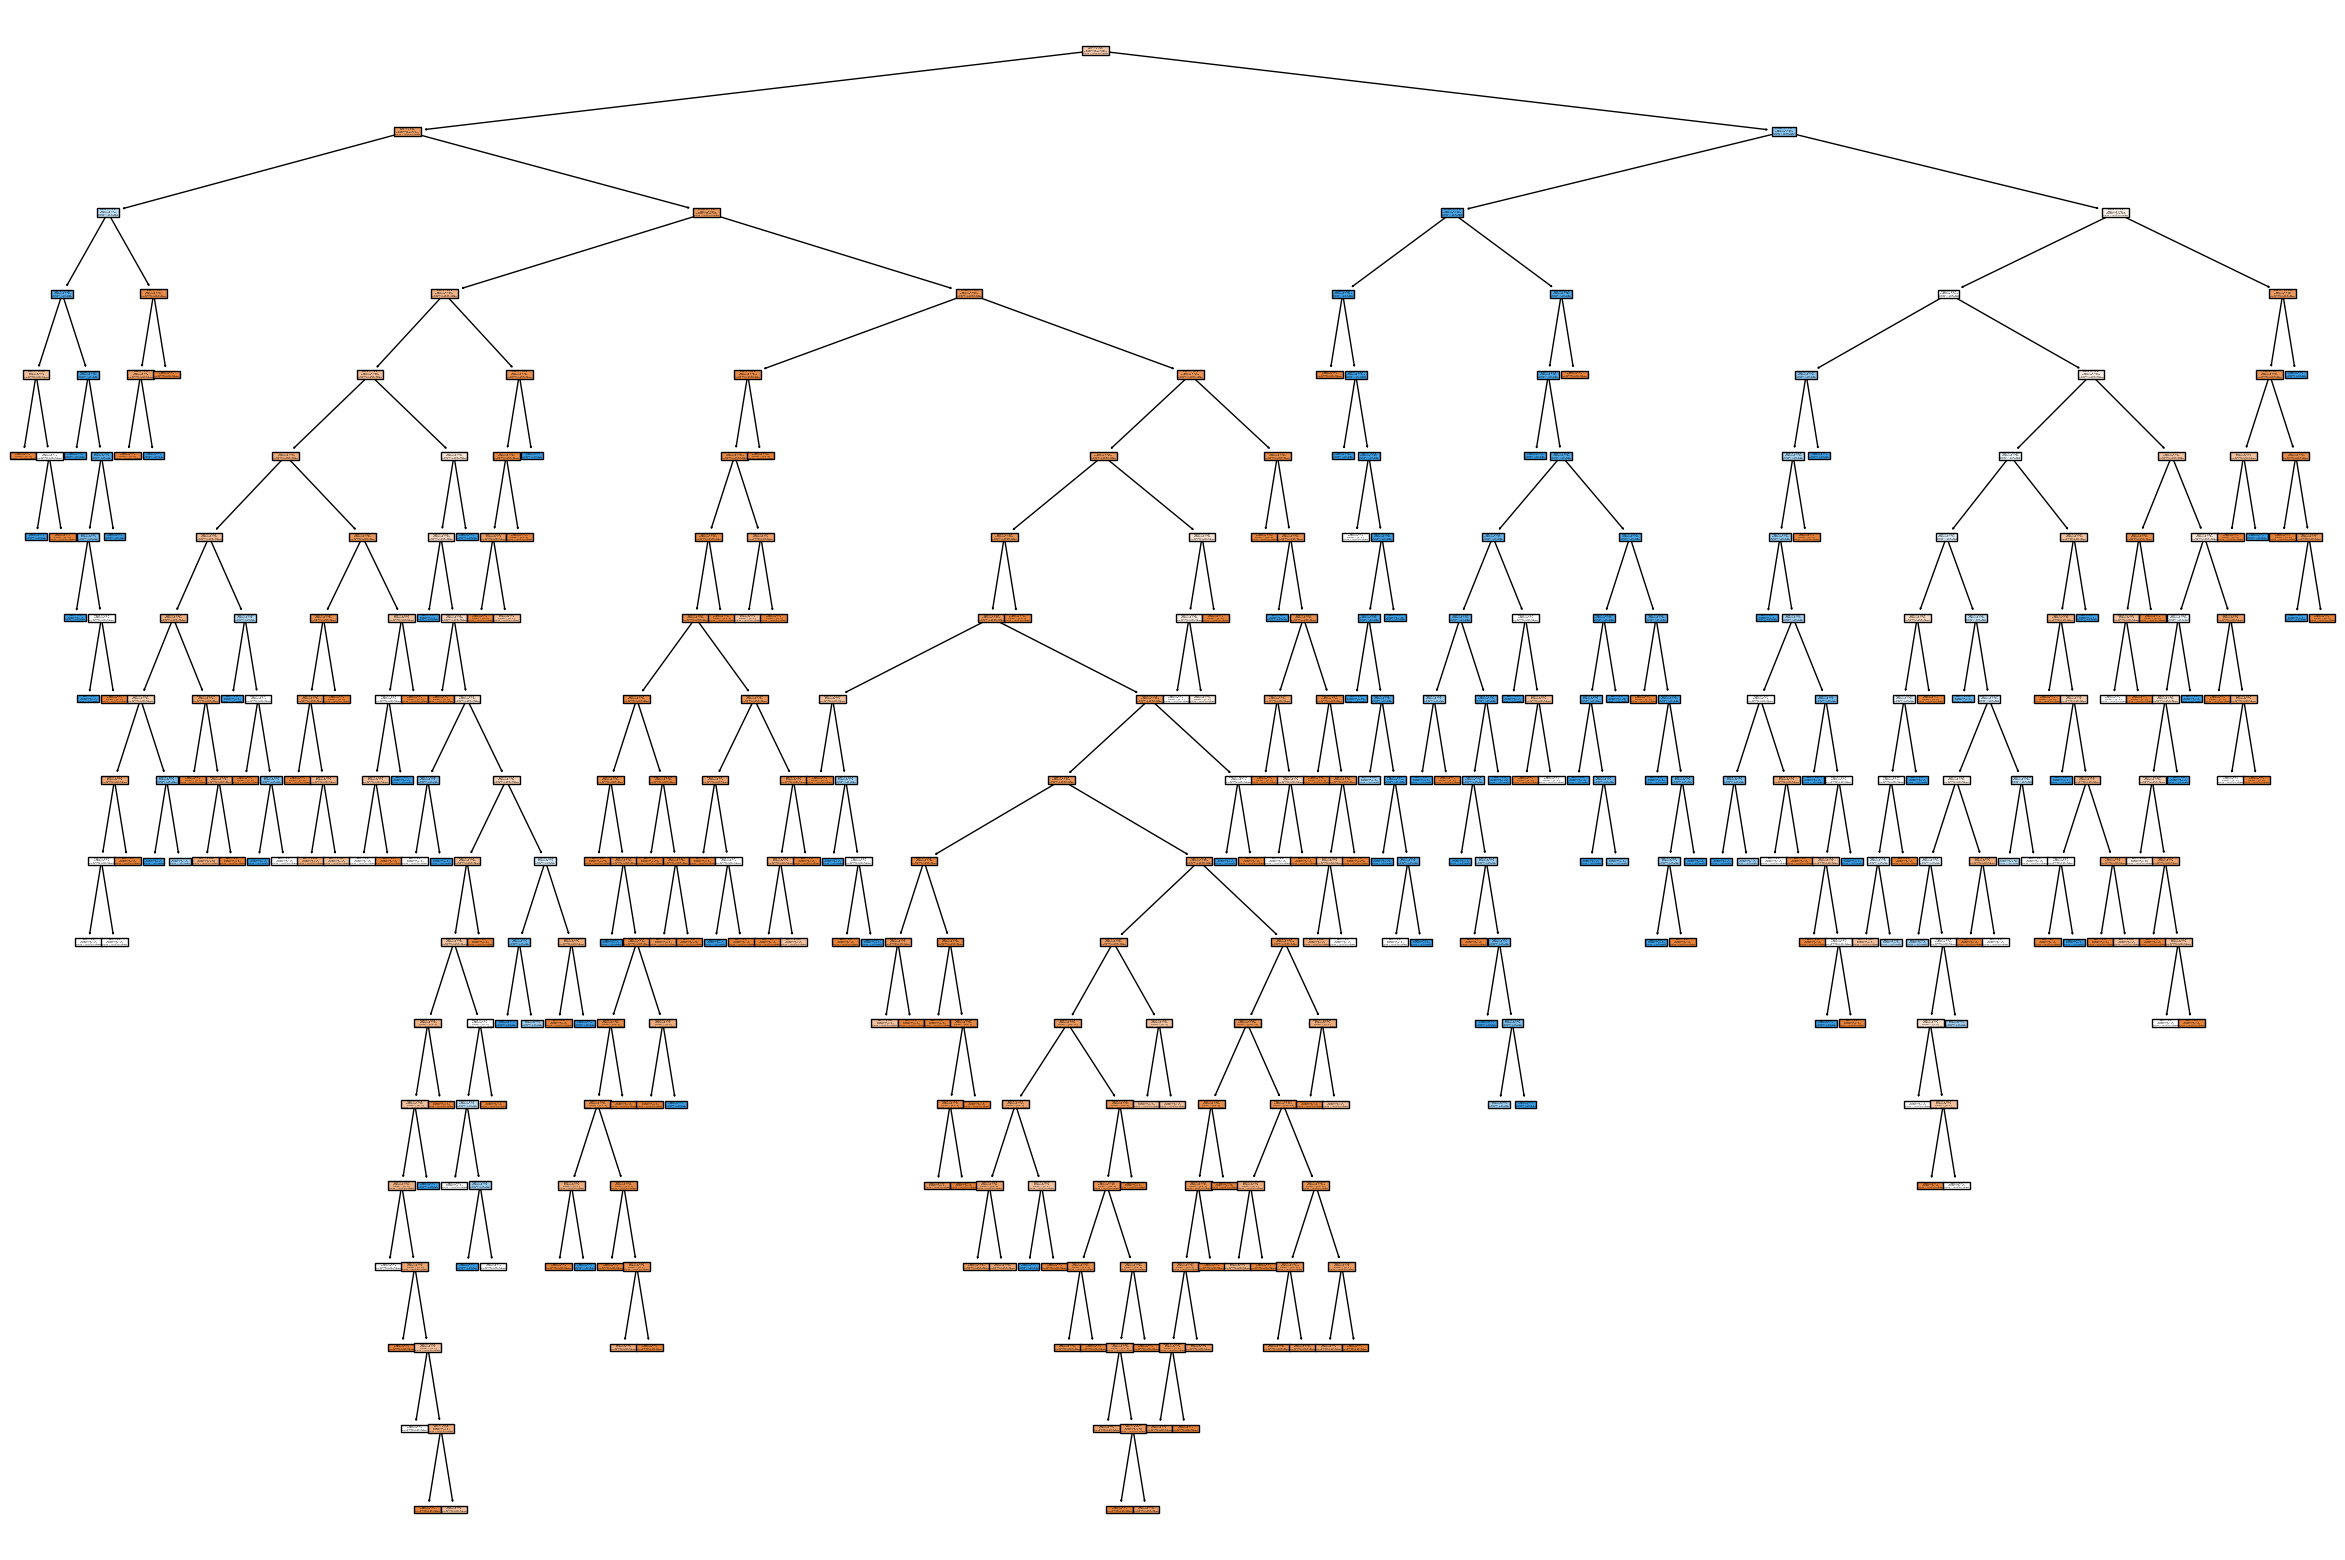

In [48]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
plt.figure(figsize=(30, 20))

plot_tree(tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)

Finding the best parameter max_leaf_nodes to prune the tree and plotting the pruned tree.

Best parameter: {'max_leaf_nodes': 14}
Best score: 0.81


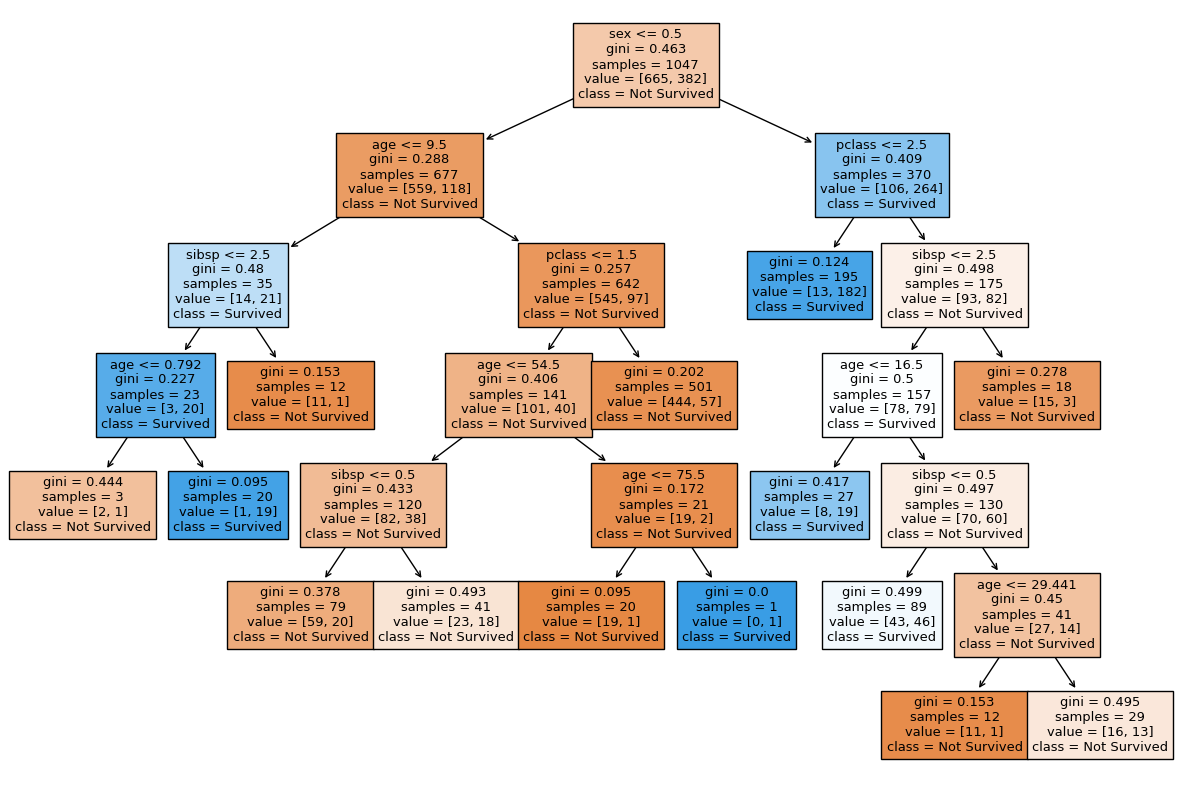

In [49]:
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_leaf_nodes': range(2, 20)}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))
pruned_tree = grid_search.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.show()

accuracy on the test set

In [50]:
y_pred = pruned_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
survived_accuracy = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatalities_accuracy = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])

print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Survived accuracy: {:.2f}%'.format(survived_accuracy * 100))
print('Fatalities accuracy: {:.2f}%'.format(fatalities_accuracy * 100))

Accuracy: 75.57%
Survived accuracy: 59.32%
Fatalities accuracy: 88.89%


training a random forest using the value of max_leaf_nodes from step 3 which is 14 and reporting the accuracy of random forest on the test set.

Train a random forest and predict on the test set

In [51]:
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=pruned_tree.max_leaf_nodes,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy on the test set

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred)
survived_correctly = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatality_correctly = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])

print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Percent Survivors Correctly Predicted: {:.2f}%".format(survived_correctly * 100))
print("Percent Fatalities Correctly Predicted: {:.2f}%".format(fatality_correctly * 100))

Random Forest Accuracy: 74.43%
Percent Survivors Correctly Predicted: 55.08%
Percent Fatalities Correctly Predicted: 90.28%


The accuracy of the random forest on the test set is slightly lower than the accuracy of the single decision tree obtained in Step 4. However, the percent survivors correctly predicted is slightly higher for the random forest than for the single tree, while the percent fatalities correctly predicted is slightly lower. It is important to note that the difference in accuracy between the two models is relatively small, so the choice between using a single decision tree or a random forest may depend on other factors such as model complexity, computational efficiency, and interpretability.